In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import npc_sessions
import polars as pl
import pandas as pd

In [2]:
units = npc_sessions.get_units_electrodes_spike_times('668755_20230831').to_pandas()
units['device_name'].unique()

C:\Users\arjun.sridhar\source\repos\npc_lims\src\npc_lims\metadata\codeocean.py:125: UserWarning: There is more than one asset for session = '668755_2023-08-31'. Defaulting to most recent: ('ecephys_668755_2023-08-31_12-33-31_units_with_peak_channels', 'ecephys_668755_2023-08-31_12-33-31_units_with_peak_channels', 'ecephys_668755_2023-08-31_12-33-31_units_with_peak_channels')
  warnings.warn(


CCF annotations for 668755_2023-08-31 have not been uploaded to s3. Returning units without electrodes


array(['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF'],
      dtype=object)

In [3]:
mean_waveforms = npc_sessions.get_mean_waveforms('662892_20230821')
#sd_waveforms = npc_sessions.get_sd_waveforms('662892_20230821')

C:\Users\arjun.sridhar\source\repos\npc_lims\src\npc_lims\metadata\codeocean.py:125: UserWarning: There is more than one asset for session = '662892_2023-08-21'. Defaulting to most recent: ('ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels', 'ecephys_662892_2023-08-21_12-43-45_units_with_peak_channels')
  warnings.warn(


In [6]:
mean_waveforms[2].shape

(210, 384)

In [8]:
plt.plot(mean_waveforms[0])

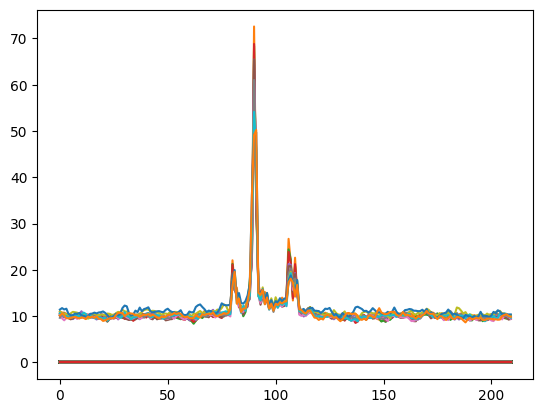

In [3]:
plt.plot(sd_waveforms[0])

In [ ]:
spike_times = npc_sessions.get_unit_spike_times_dict('636766_20230124', tuple(units['unit_name']))
spike_times

In [ ]:
len(units) == len(spike_times)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import npc_sessions
import polars as pl
import pandas as pd

sessions = []
for s in npc_sessions.tracked:
    try:
        result = s.is_uploaded
    except ValueError:       
        continue
    else:
        if not result:
            continue
    try:
        _ = npc_sessions.get_units_electrodes(s.session)
    except (FileNotFoundError, TypeError, ValueError) as exc:
        print(f'{s.session}: {exc!r}')
    else:
        print(f'{s.session}: units available')
        sessions.append(npc_sessions.Session(s.session))



session = next(s for s in sessions if s.id == '626791_2022-08-17')




stim = next(s for s in session.stim_data if 'DynamicRouting' in s)
trials = npc_sessions.DynamicRouting1(session.stim_data[stim], session.sync_data)
df = npc_sessions.get_units_electrodes_spike_times(session.id)

vis = df.filter(pl.col('structure_acronym').str.contains('VIS'))
aud = df.filter(pl.col('structure_acronym').str.starts_with('AUD'))

for spike_times in vis['spike_times']:
# spike_times = vis[random.randrange(len(vis))]['spike_times'][0]

    pad_start = .5
    pad_end = .5
    # align_on = 'response_window_start_time'
    align_on_time = 'stim_start_time'
    on = trials.to_dataframe().query('is_vis_stim')[align_on_time].values - pad_start
    off = pad_start + on + pad_end

    fig, ax = plt.subplots()
    ax.eventplot(
        [spike_times[a:b] - on[idx] - pad_start 
        for idx, (a, b)
        in enumerate(zip(np.searchsorted(spike_times, on), np.searchsorted(spike_times, off)))]
    )
    ax.axvline(0, color=[.8]*3, linestyle='--')
    ax.set(xlabel='time, s', ylabel='trials', xmargin=0, ymargin=0)
    ax2 = ax.secondary_xaxis('top')
    ax2.set(xticks=[0], xticklabels=[align_on_time])
    plt.show()

In [68]:
def plot_unit_quality_metrics_per_probe(units:pd.DataFrame):
    metrics = ['drift_ptp', 'isi_violations_ratio', 'amplitude', 'amplitude_cutoff', 'presence_ratio']
    probes = units['device_name'].unique()
    
    x_labels = {'presence_ratio': 'fraction of session', 'isi_violations_ratio': 'violation rate', 'drift_ptp': 'microns', 'amplitude': 'uV',
                'amplitude_cutoff': 'frequency'}

    for metric in metrics:
        fig, ax = plt.subplots(1, len(probes))
        probe_index = 0
        fig.suptitle(f'{metric}')
        for probe in probes:
            units_probe_metric = units[units['device_name'] == probe][metric]
            ax[probe_index].hist(units_probe_metric, bins=20)
            ax[probe_index].set_title(f'{probe}')
            ax[probe_index].set_xlabel(x_labels[metric])
            probe_index += 1
    
        fig.set_size_inches([16, 6])
    plt.tight_layout()

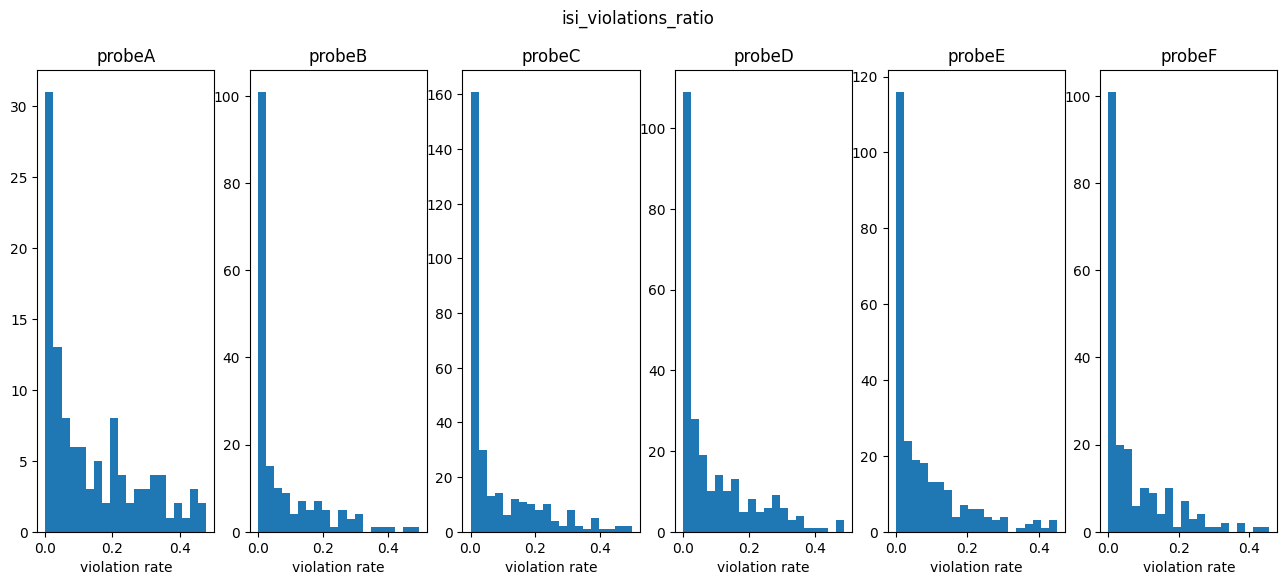

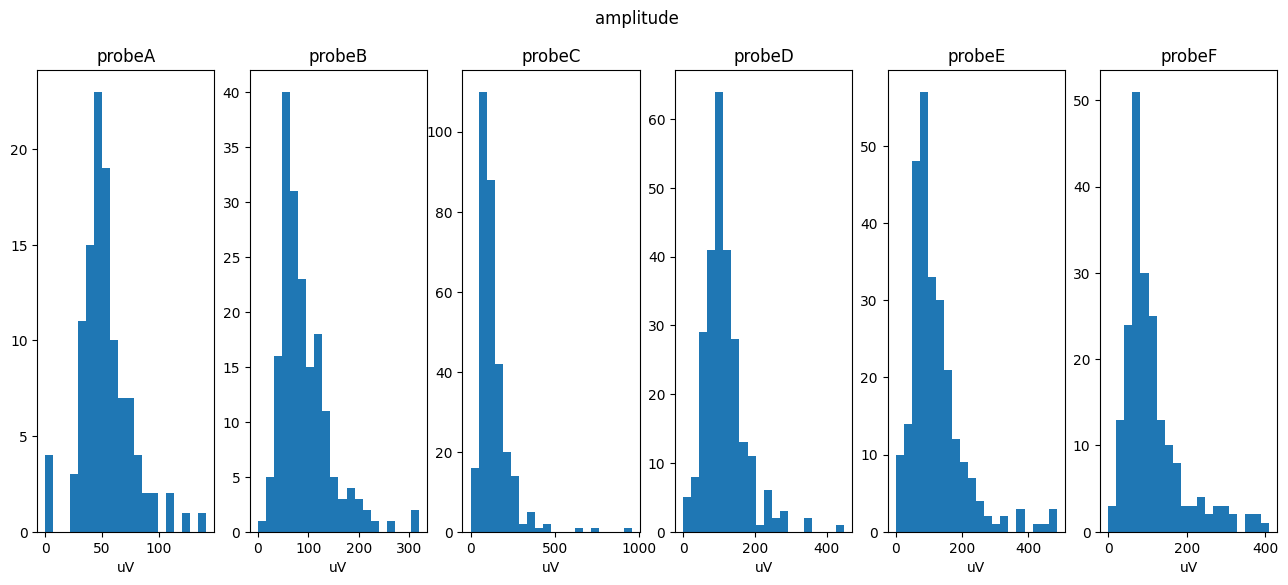

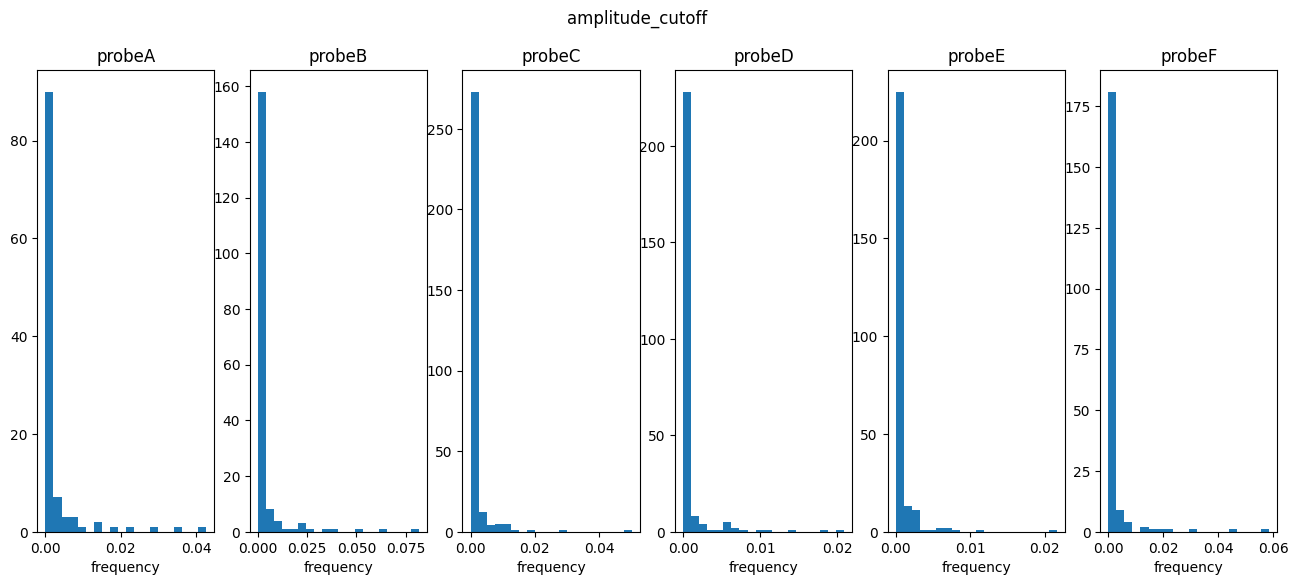

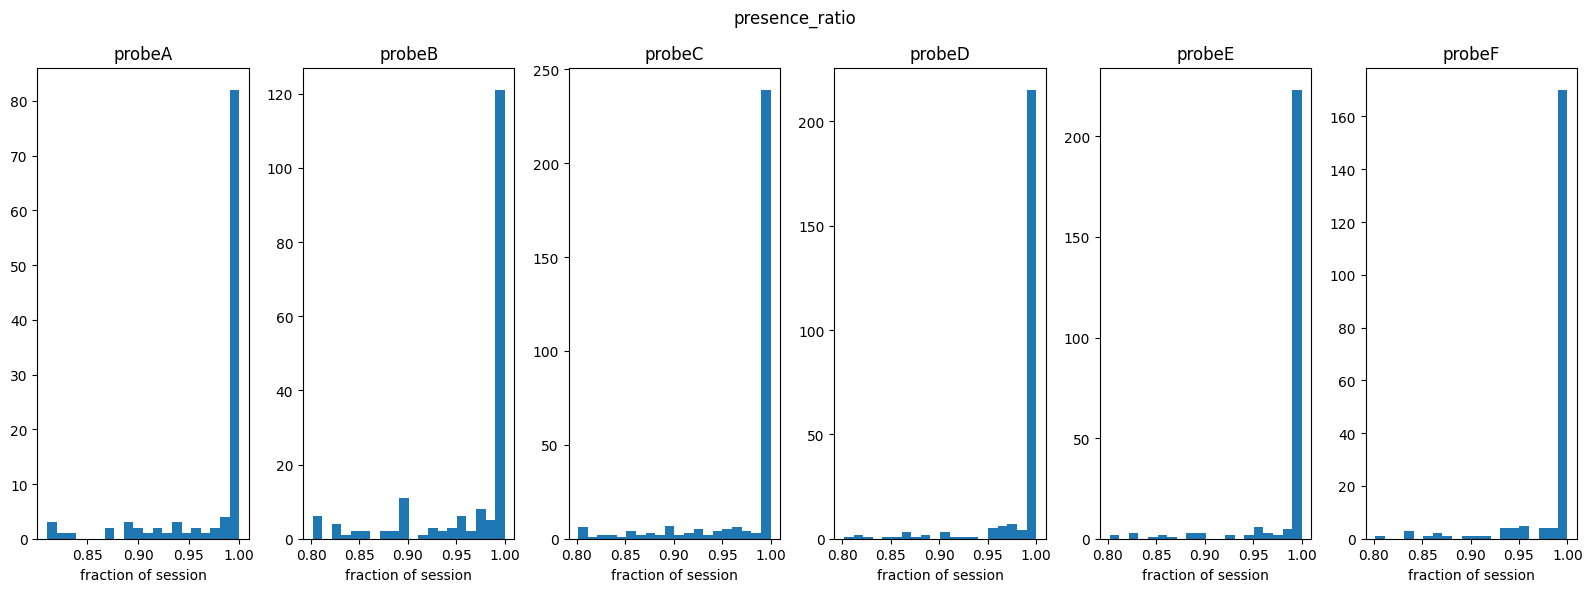

In [69]:
session = '662892_20230821'

units_spikes_electrodes = npc_sessions.get_units_electrodes_spike_times(session).to_pandas()
plot_unit_quality_metrics_per_probe(units_spikes_electrodes)

In [100]:
trials = nwb.trials[:]
vis_context_trials = trials[(trials['is_vis_target']) & (trials['is_vis_context'])]
opto_trials

start_time    stop_time  quiescent_start_time  quiescent_stop_time  \
id                                                                         
0    2686.145146  2691.649736           2686.145146          2687.646406   
1    2692.350316  2697.854956           2692.350316          2693.851566   
2    2700.171534  2705.693784           2700.171534          2701.672804   
3    2709.112006  2714.635526           2709.112006          2710.613246   
4    2717.504646  2723.023726           2717.504646          2719.020366   
..           ...          ...                   ...                  ...   
386  5523.538674  5529.093364           5523.538674          5525.056644   
388  5535.565596  5541.103576           5535.565596          5537.066836   
398  5619.919484  5625.457444           5619.919484          5621.437424   
403  5655.849594  5661.387564           5655.849594          5657.350854   
404  5663.956406  5669.494476           5663.956406          5665.474496   

     stim_start_time  stim_stop_time  opto_start_time  opto_stop_time  \
id                                                                      
0        2687.646406     2688.146846              NaN             NaN   
1        2693.851566     2694.351996              NaN             NaN   
2        2701.672804     2702.173214              NaN             NaN   
3        2710.613246     2711.113686              NaN             NaN   
4        2719.020366     2719.520746              NaN             NaN   
..               ...             ...              ...             ...   
386      5525.056644     5525.557064              NaN             NaN   
388      5537.066836     5537.567316              NaN             NaN   
398      5621.437424     5621.937844              NaN             NaN   
403      5657.350854     5657.851274              NaN             NaN   
404      5665.474496     5665.974826              NaN             NaN   

     response_window_start_time  response_window_stop_time  ...  is_catch  \
id                                                          ...             
0                   2687.746486                2688.647256  ...     False   
1                   2693.951686                2694.852416  ...     False   
2                   2701.772884                2702.673644  ...     False   
3                   2710.713406                2711.614116  ...     False   
4                   2719.120476                2720.021126  ...     False   
..                          ...                        ...  ...       ...   
386                 5525.156734                5526.074154  ...     False   
388                 5537.166946                5538.084236  ...     False   
398                 5621.537514                5622.438274  ...     False   
403                 5657.450934                5658.368394  ...     False   
404                 5665.574526                5666.475306  ...     False   

     is_aud_target  is_vis_target  is_aud_nontarget  is_vis_nontarget  \
id                                                                      
0            False           True             False             False   
1            False           True             False             False   
2            False           True             False             False   
3            False           True             False             False   
4            False           True             False             False   
..             ...            ...               ...               ...   
386          False           True             False             False   
388          False           True             False             False   
398          False           True             False             False   
403          False           True             False             False   
404          False           True             False             False   

    is_vis_context  is_aud_context  is_context_switch is_repeat  is_opto  
id                                      

In [82]:
def plot_all_unit_spike_histograms(units: pd.DataFrame):
    probes = units['device_name'].unique()

    for probe in probes:
        fig, ax = plt.subplots()
        unit_spike_times = units[units['device_name'] == probe]['spike_times'].to_numpy()

        hist, bins = npc_sessions.bin_spike_times(unit_spike_times, bin_time=1)
        ax.plot(hist)
        ax.set_title(f'{probe} Spike Histogram')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Spike Count per 1 second bin')

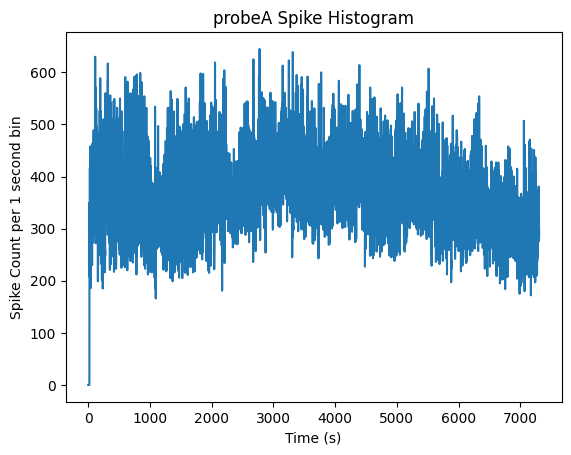

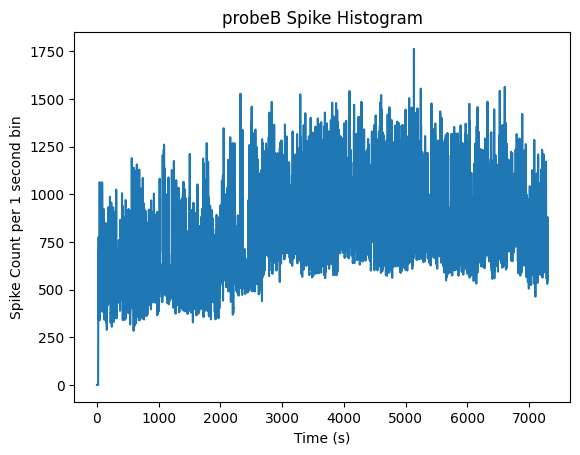

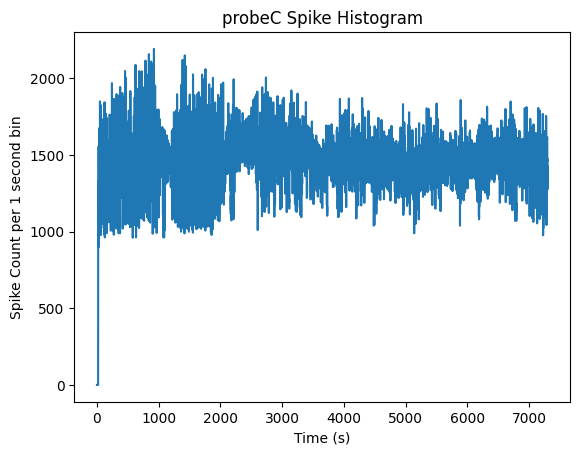

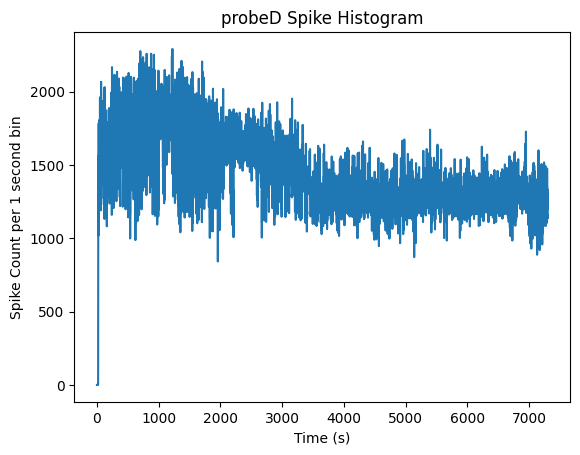

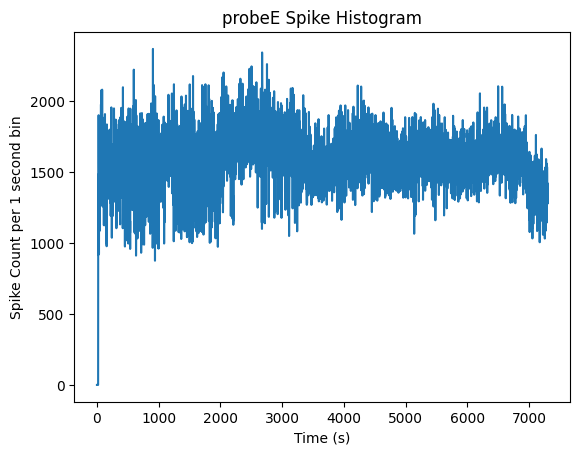

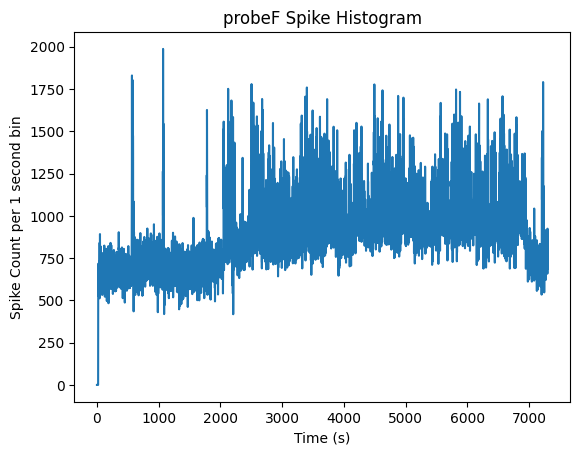

In [83]:
plot_all_unit_spike_histograms(units_spikes_electrodes)

In [92]:
def plot_unit_spikes_channels(units: pd.DataFrame, lower_channel: int, upper_channel: int):
    probes = units['device_name'].unique()
    for probe in probes:
        fig, ax = plt.subplots()
        unit_spike_times = units[units['device_name'] == probe]
        unit_spike_times_channel = unit_spike_times[(unit_spike_times['peak_channel'] >= lower_channel) & 
                                                    (unit_spike_times['peak_channel'] <= upper_channel)]['spike_times'].to_numpy()
        hist, bins = npc_sessions.bin_spike_times(unit_spike_times_channel, bin_time=1)

        ax.plot(hist)
        ax.set_title(f'{probe} spike hist for channel range {lower_channel} to {upper_channel}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Spike Count per 1 second bin')

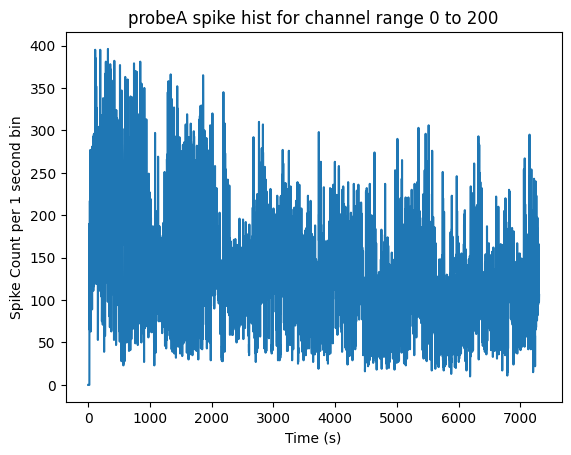

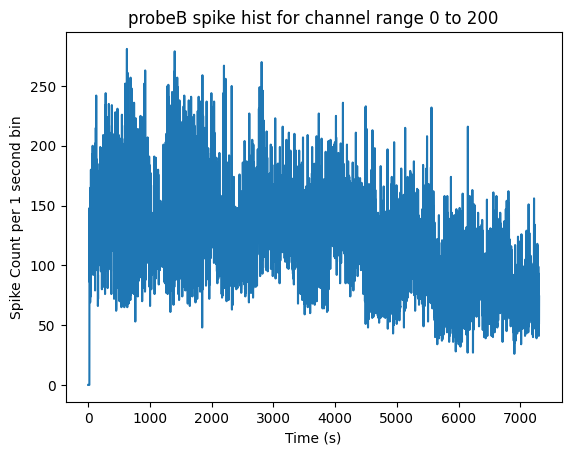

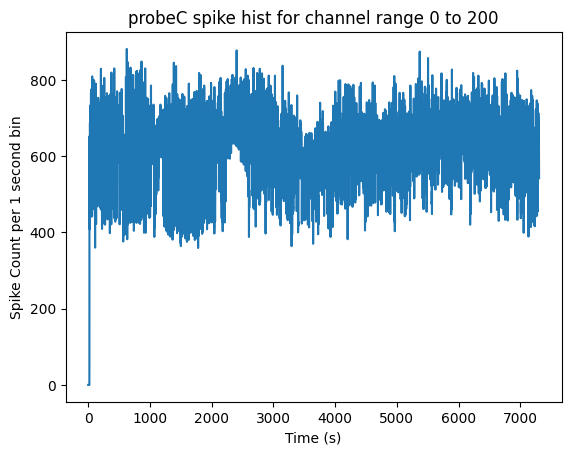

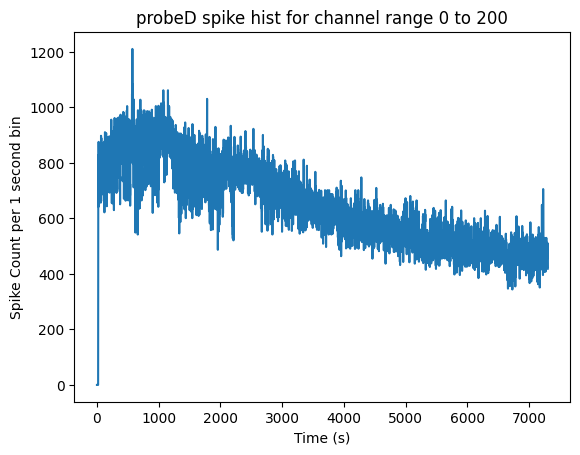

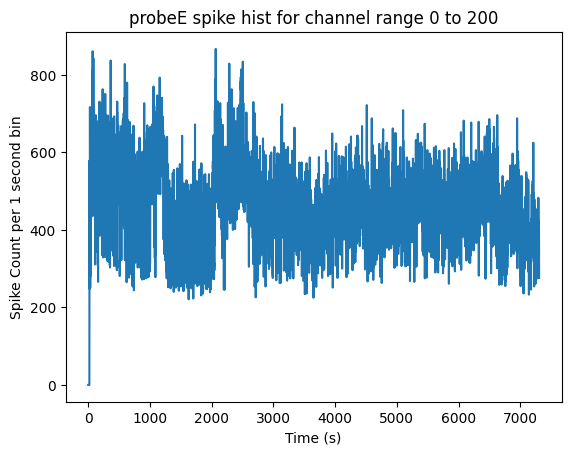

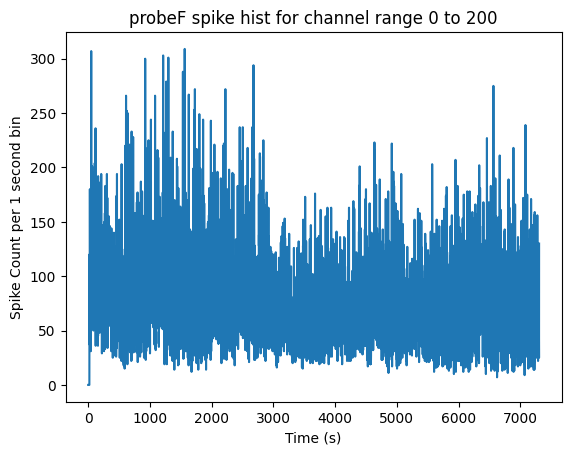

In [94]:
plot_unit_spikes_channels(units_spikes_electrodes, 0, 200)